In [1]:
import pandas as pd
import numpy as np
from numpy.typing import NDArray

from dtw import *
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



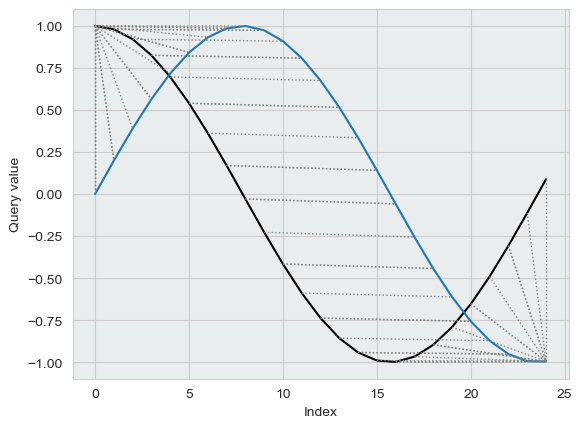

In [2]:
x = np.arange(0, 5, 0.2)
y1 = np.cos(x)
y2 = np.sin(x)

alignment = dtw(y1, y2, keep_internals=True)
ax = alignment.plot(type='twoway')
ax.set_facecolor("#e9edee")

<Axes: >

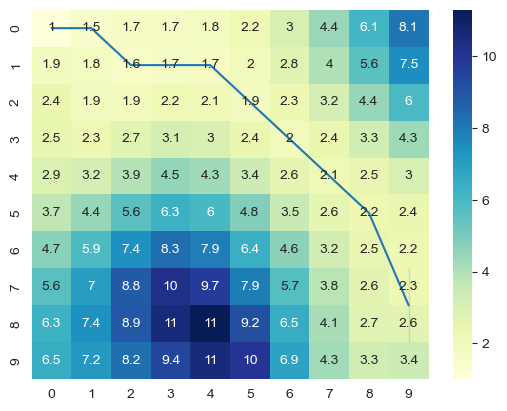

In [3]:
x = np.arange(0, 5, 0.5)
y1 = np.cos(x)
y2 = np.sin(x)

alignment = dtw(y1, y2, keep_internals=True)
sns.heatmap(alignment.costMatrix, annot=True, cmap = "YlGnBu")
sns.lineplot(x=alignment.index2s+0.5, y=alignment.index1s+0.5)

<Axes: xlabel='Index', ylabel='Query value'>

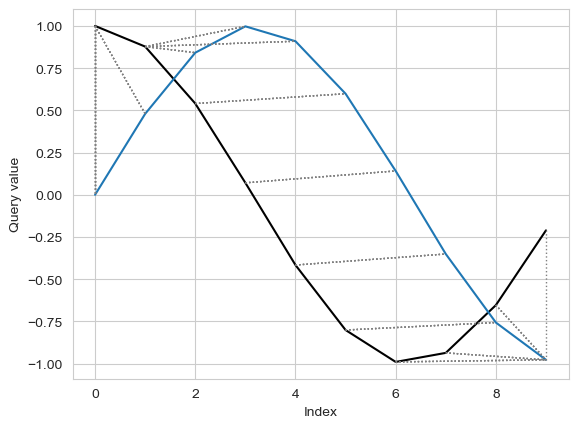

In [4]:
alignment.plot(type='twoway')

In [5]:
normal_df = pd.read_csv("data/ptbdb_normal.csv", header = None, index_col=False)
anomaly_df = pd.read_csv("data/ptbdb_abnormal.csv", header = None, index_col=False)
normal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


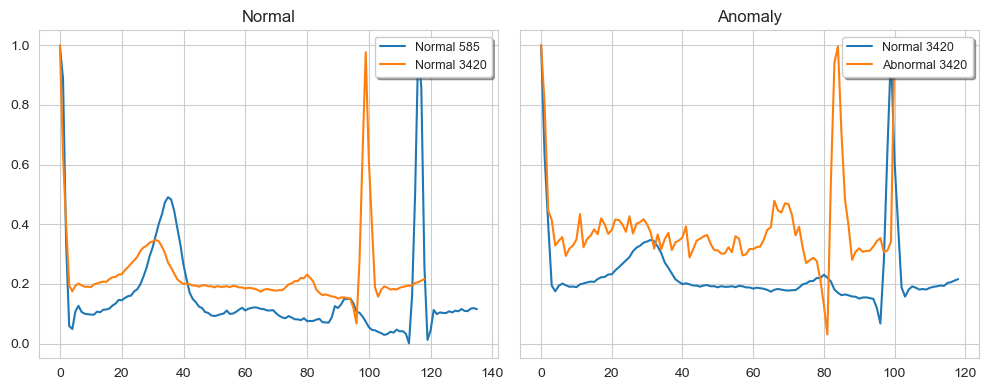

In [6]:
index = np.random.randint(0, len(normal_df), 2)

normal_0 = normal_df.iloc[index[0], :].values
normal_1 = normal_df.iloc[index[1], :].values

abnormal_1 = anomaly_df.iloc[index[1], :].values



fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax[0].plot(np.delete(normal_0, np.where(normal_0 == 0)), label=f"Normal {index[0]}")
ax[0].plot(np.delete(normal_1, np.where(normal_1 == 0)), label=f"Normal {index[1]}")
ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
ax[0].set_title("Normal")

ax[1].plot(np.delete(normal_1, np.where(normal_1 == 0)), label=f"Normal {index[1]}")
ax[1].plot(np.delete(abnormal_1, np.where(abnormal_1 == 0)), label=f"Abnormal {index[1]}")
ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
ax[1].set_title("Anomaly")

plt.tight_layout()
plt.show()

12.211


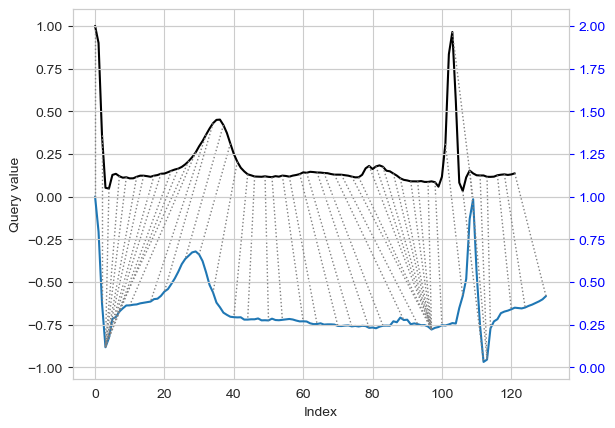

In [7]:
normal_0 = normal_df.iloc[0, :].values[normal_df.iloc[0, :].values != 0]
normal_1 = normal_df.iloc[1, :].values[normal_df.iloc[1, :].values != 0]

test1 = dtw(normal_0, normal_1, keep_internals=True, step_pattern='asymmetric')
test1.plot(type="twoway",offset=-1)
print(round(test1.distance, 3))


19.814


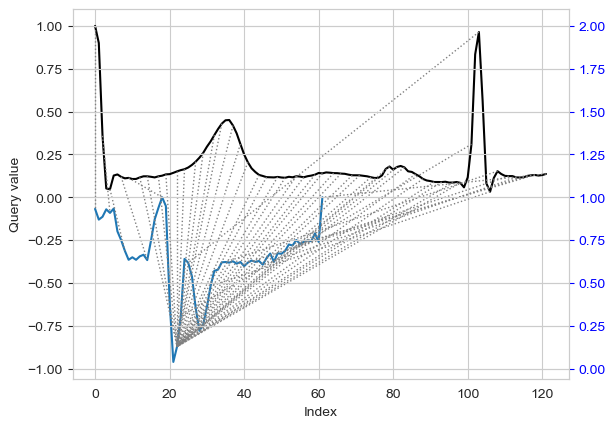

In [8]:
anomaly_0 = anomaly_df.iloc[0, :].values[anomaly_df.iloc[0, :].values != 0]
test2 = dtw(normal_0, anomaly_0, keep_internals=True, step_pattern='asymmetric')
test2.plot(type="twoway",offset=-1)
print(round(test2.distance, 3))

In [9]:
def dtw_distance(time_series1: NDArray,
                 time_series2: NDArray) -> np.float_:

    time_series1: NDArray = time_series1[time_series1 != 0]
    time_series2: NDArray = time_series2[time_series2 != 0]
    dtw_test = dtw(time_series1, time_series2, keep_internals=True, step_pattern='asymmetric')
    distance: np.float_ = round(dtw_test.distance, 3)

    return distance

def compute_distances(df1, df2) -> NDArray:
    results = np.empty((df1.shape[0], df2.shape[0]))

    for i in np.arange(df1.shape[0]):
        for j in np.arange(df2.shape[0]):
            try:
                results[i, j] = dtw_distance(df1.iloc[i, :], df2.iloc[j, :])
            except:
                results[i, j] = np.nan

    return results

In [10]:
n = 100
normal_results = compute_distances(normal_df.iloc[:n, :], normal_df.iloc[:n, :])
anomaly_results = compute_distances(normal_df.iloc[:n, :], anomaly_df.iloc[:n, :])

In [11]:
normal_medians = np.nanmedian(normal_results, axis=0)
anomaly_medians = np.nanmedian(anomaly_results, axis=0)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score

In [13]:
X = np.concatenate((normal_medians, anomaly_medians))
X = X.reshape(X.size, 1)
y = np.concatenate((np.repeat(0, normal_medians.size), np.repeat(1, anomaly_medians.size)))

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Minimum error:- 0.3939393939393939 at K = 1


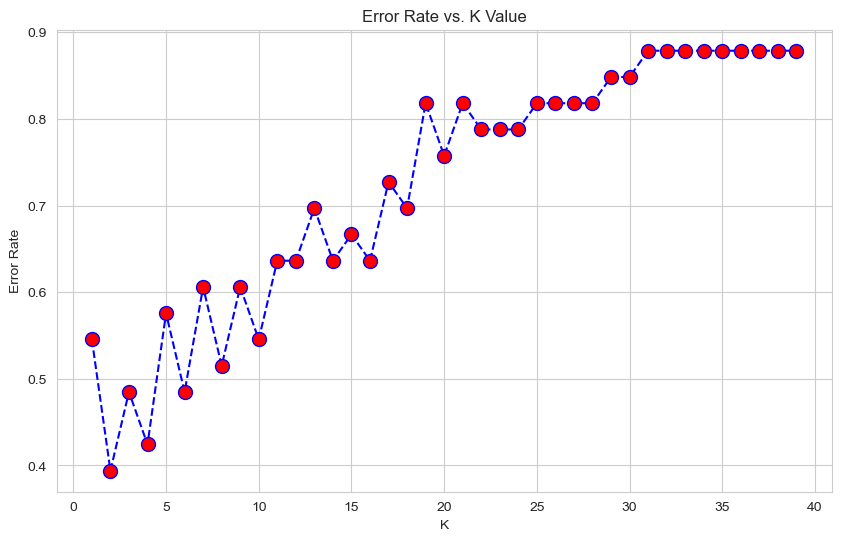

In [14]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(recall_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

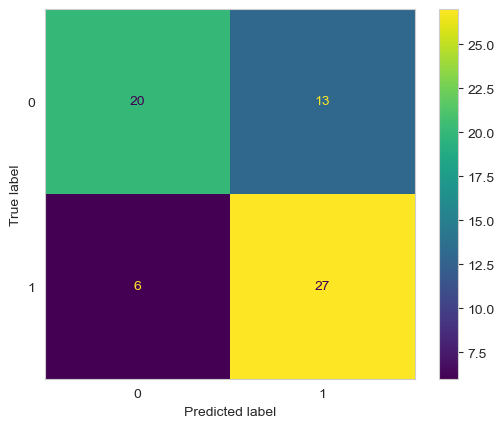

In [17]:
neigh = KNeighborsClassifier(n_neighbors=19)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)

In [18]:
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred), 3)

print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))

Accuracy: 0.712
Precision: 0.675
Recall: 0.818
F1: 0.74
